<a href="https://colab.research.google.com/github/archi-8804/Binary-classification/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Classification using TensorFlow**

Generate toy data for binary classification

In [61]:
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
X,y = make_circles(n_samples=1000,
                 noise=0.02,
                 random_state=42)

In [63]:
X[:2], y[:2]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ]]),
 array([1, 1]))

Split data to train and test

In [64]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

Visualisation

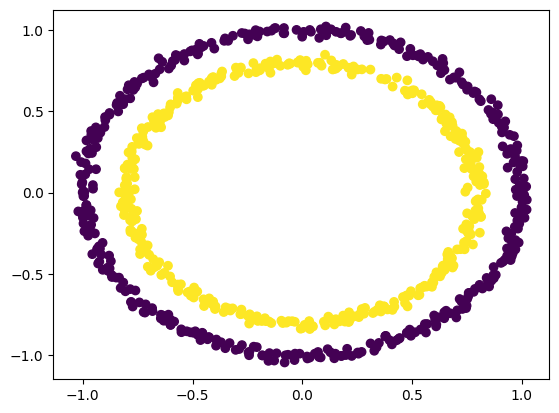

In [66]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [67]:
#Function for data visualisation
def visualize_predictions(X_test,y_test,y_pred):
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.scatter(X_test[:,0],X_test[:,1], c=y_test)

  plt.subplot(1,2,2)
  plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

Create binary classification model with tensorflow

In [68]:
#Set random seed
tf.random.set_seed(42)

#Create model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [69]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [70]:
history=model.fit(X_train,y_train,
                  epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6954 - accuracy: 0.4750
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5213
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5688
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5650
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.5562
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.5825
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.6338
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6587
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7025
Epoch 11/25
25/25 [

7/7 [==============================] - 0s 2ms/step


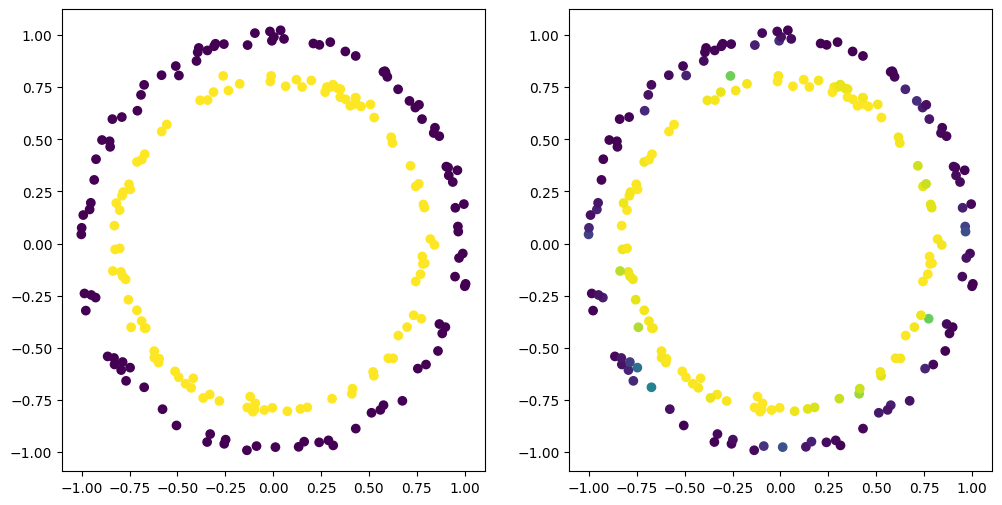

In [71]:
y_pred = model.predict(X_test)
visualize_predictions(X_test,y_test,y_pred)

Evaluate model

In [72]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0420 - accuracy: 1.0000


[0.041962891817092896, 1.0]

In [73]:
y_test[0],y_pred[0]


(1, array([0.977274], dtype=float32))

In [74]:
cm=confusion_matrix(y_test, tf.round(y_pred))
cm

array([[100,   0],
       [  0, 100]])

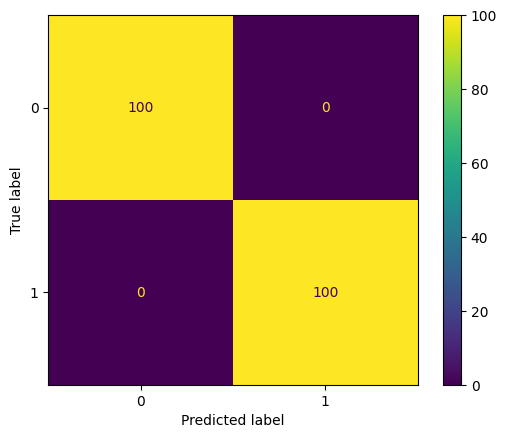

In [75]:
ConfusionMatrixDisplay(cm).plot()